Угловая дисперсия:

In [716]:
import pandas as pd
import matplotlib as plt

L = 0.1 # мм
f = 94 # мм
dl = 6 # нм
l = 5893 # нм

data = pd.read_csv("./data/e3t1.csv") # Желтый фильтр натрий
data['D_light'] = data['h2_light'] - data['h1_light']
data['D_dark'] = data['h2_dark'] - data['h1_dark']
data['D_error'] = 0.001

data['y'] = (data['D_light']**2 - data['D_dark']**2)/(4*f*f)
data['l'] = (data['D_light']**2 - data['D_dark']**2)/(4*f*f) * L / data['number'] * 1e7
# data['y'] = (data['D_light']**2 + data['D_dark']**2)/(8*f*f)
# data['l'] = (data['D_light']**2 + data['D_dark']**2)/(8*f*f) * L / data['number'] * 1e7
print(data)

   number  h1_light  h2_light  h1_dark  h2_dark  D_light  D_dark  D_error  \
0       6   135.300   174.043  136.069  173.530   38.743  37.461    0.001   
1       5   137.392   172.399  138.110  171.796   35.007  33.686    0.001   
2       4   139.452   170.714  140.072  170.010   31.262  29.938    0.001   
3       3   141.500   168.445  142.334  167.670   26.945  25.336    0.001   
4       2   144.005   165.983  144.897  164.835   21.978  19.938    0.001   
5       1   147.265   162.582  148.575  161.036   15.317  12.461    0.001   

          y            l  
0  0.002764   460.679455  
1  0.002567   513.487172  
2  0.002293   573.143957  
3  0.002380   793.346622  
4  0.002419  1209.662743  
5  0.002245  2244.623359  


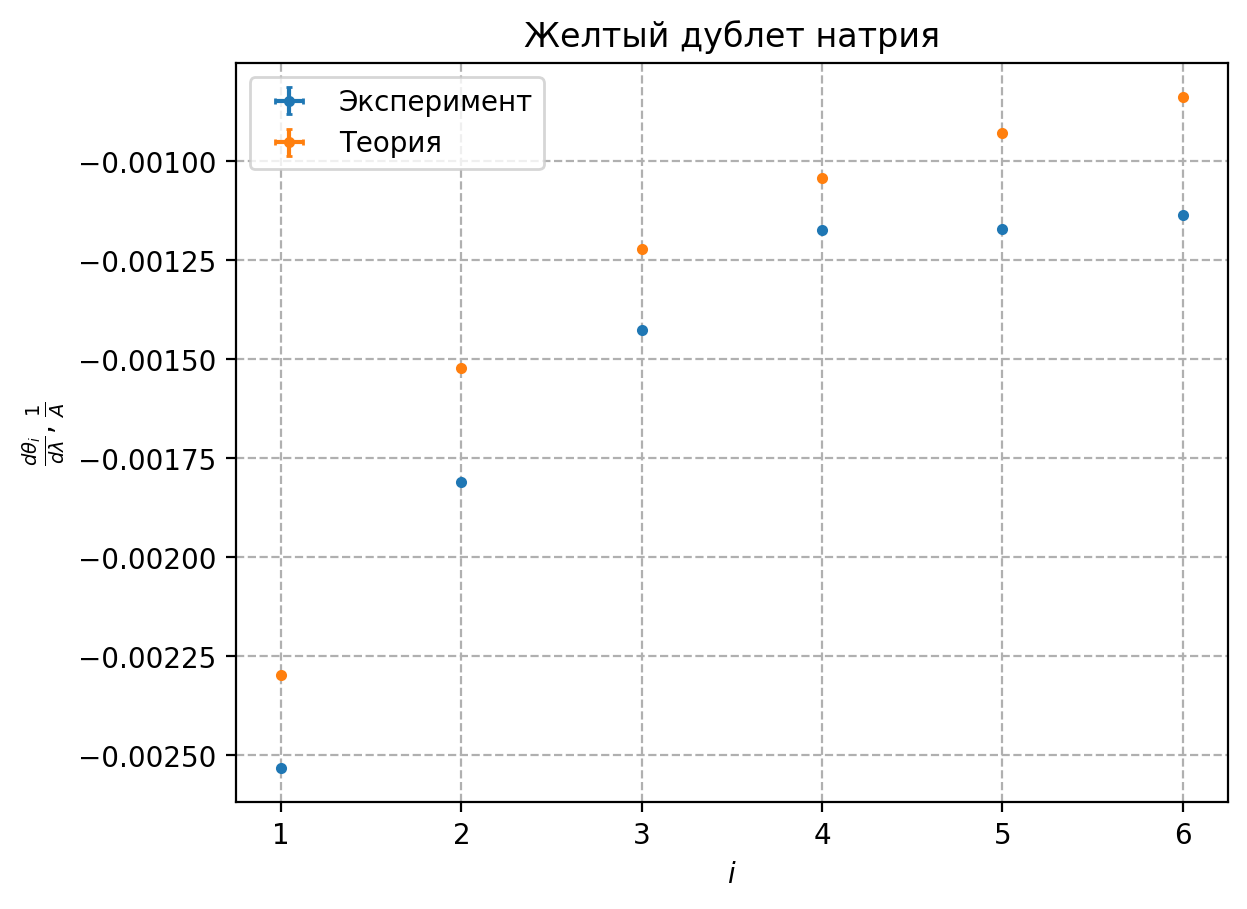

In [717]:
data['y'] = (data['D_light'] - data['D_dark']) / (2 * f * dl)
data['y_error'] = 2 * data['D_error'] / (2 * f * dl)
data['theory'] = - 2 * f / (l * (data['D_dark'] + data['D_light'])/2)

plt.grid(True, linestyle="--")
plt.errorbar(data['number'], -data['y'], yerr=data['y_error'], xerr=0,
             fmt=".", capsize=1, label='Эксперимент')
plt.errorbar(data['number'], data['theory'], yerr=0, xerr=0,
             fmt=".", capsize=1, label='Теория')

plt.xlabel(r"$i$")
plt.ylabel(r'$\frac{d \theta_i}{d \lambda}$, $\frac{1}{A}$')
plt.title(r"Желтый дублет натрия")
plt.legend()
plt.savefig("./images/D")
plt.show()